# Climate Connect Technologies Ltd  Assignement

## Predict Power of Solar Generation

The data science skills can help you predict the power of solar generation plant based on a given set of features -

### Weather Data

Unnamed - serial numbers

plant_id - Plant ID

datetime_utc - Coordinated Universal Time

datetime_local - Indian Standard Time

cloud_cover - Clouds when observed from a particular location

apparent_temperature - Temperature equivalent perceived by humans

temperature - Atmosphere Temperature

humidity - Humidity of Location

dew_point - Dew point is the temperature to which air must be cooled

wind_bearing  - Indicates the direction of wind

wind_speed  - Indicates speed of wind

wind_chill   - Its lowering of body temperature due to the passing-flow of lower-temperature air

wind_gust    - Its a brief increase in the speed of the wind

heat_index   -  Its combines air temperature and relative humidity

pressure    -   Atmospheric pressure

qpf        -  Quantitative precipitation forecast

uv_index   -  Ultraviolet index 

snow       -  Indicates snow fall

pop        -  Probability of precipitation

fctcode    -  Its hourly forecast code         

ozone      - Indicates ozone 

precip_accumulation  - Hourly Precipitation

precip_intensity     - Its amount of precipitation collected per unit time interval     

precip_probability   - Its referred to as chance of precipitation    

precip_type          - Its phase of the precipitation which is falling to ground level. 

visibility - Its measure of the distance at which an object can be clearly discerned

sunrise    - Sunrise time

sunset     - Sunset time

icon       - Details of atmosphere              

summary    - Summary of weather

updated_at   - Data updated at time

### Energy data

ghi     - Global Horizontal Irradiance

gti     - Global Tilted Irradiation/Irradiance    

power   - Power generated from the plant

### Importing Python libraries and Data set

In [1]:
#Importing numerical libraries
import numpy as np 

#Importing dataframe libraries pandas 
import pandas as pd

#Importing ploting libraries for plot
import matplotlib.pyplot as plt   

#Importing seaborn for statistical plots
import seaborn as sns

#Importing seaborn for statistical libraries
import scipy.stats as st
import statsmodels.formula.api as smf

#To enable plotting graphs in Jupyter notebook
%matplotlib inline 


In [2]:
#Reading the CSV file into pandas dataframe
weather = pd.read_csv("weather_actuals.csv",parse_dates=[0], index_col=3)  
energy = pd.read_csv("power_actual.csv",parse_dates=[0], index_col=1)

### Information About Dataset

#### Weather Data

In [3]:
#checking the top 5 details of Datasets
print("\n\nTop 5 rows of the datasets :-")
weather.head()



Top 5 rows of the datasets :-


,Unnamed: 0,plant_id,datetime_utc,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
datetime_local,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,0,1,2017-09-30 18:30:00,0.0,26.52,26,1,19.46,308,0.83,...,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
2017-10-01 01:00:00,1,1,2017-09-30 19:30:00,0.0,28.78,27,1,20.06,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2017-10-01 02:00:00,2,1,2017-09-30 20:30:00,0.0,26.58,26,1,19.97,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2017-10-01 03:00:00,3,1,2017-09-30 21:30:00,0.0,23.84,23,1,18.66,270,0.45,...,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
2017-10-01 04:00:00,4,1,2017-09-30 22:30:00,0.0,24.13,24,1,17.84,-9999,-9999.00,...,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16


In [4]:
#checking the bottom 5 details of Datasets
print("\n\nBottom 5 details of the datasets :-")
weather.tail()



Bottom 5 details of the datasets :-


,Unnamed: 0,plant_id,datetime_utc,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
datetime_local,,,,,,,,,,,,,,,,,,,,,
2019-09-30 19:00:00,13614,1,2019-09-30 13:30:00,0.16,31.66,29,1,21.19,40,2.72,...,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
2019-09-30 20:00:00,13615,1,2019-09-30 14:30:00,0.16,30.42,28,1,21.35,59,3.24,...,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
2019-09-30 21:00:00,13616,1,2019-09-30 15:30:00,0.18,29.56,27,1,21.61,76,3.34,...,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
2019-09-30 22:00:00,13617,1,2019-09-30 16:30:00,0.30,28.97,27,1,21.99,88,3.22,...,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46
2019-09-30 23:00:00,13618,1,2019-09-30 17:30:00,0.35,28.15,26,1,22.09,95,3.14,...,NaN,0.0,0.0,NaN,16.09,2019-09-30 00:51:16,2019-09-30 12:46:54,partly-cloudy-night,Partly Cloudy,2019-10-01 23:32:46


In [5]:
#checking the columns in the Datasets
print("\n\nColumns in the datasets :-")
print("\nData Set : \n",'\n', list(weather.columns))



Columns in the datasets :-

Data Set : 
 
 ['Unnamed: 0', 'plant_id', 'datetime_utc', 'cloud_cover', 'apparent_temperature', 'temperature', 'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust', 'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode', 'ozone', 'precip_accumulation', 'precip_intensity', 'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset', 'icon', 'summary', 'updated_at']


In [6]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :-")
print("\nData Set : \n",'\n',weather.dtypes)



Datatypes of features in the datasets :-

Data Set : 
 
 Unnamed: 0               object
plant_id                  int64
datetime_utc             object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_chill              float64
wind_gust               float64
heat_index              float64
pressure                float64
qpf                     float64
uv_index                  int64
snow                    float64
pop                     float64
fctcode                 float64
ozone                   float64
precip_accumulation     float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at   

In [7]:
#checking the number of rows
print("\n\nNumber of observations in the datasets :-")
print("\nData Set : \n",len(weather))

#checking the number of columns
print("\n\nNumber of features in the dataset :-")
print("\nData Set : ", len(weather.columns))


#checking the shape of dataset
print("\n\nShape of the dataset :-")
print("\nData Set : \n",weather.shape)




Number of observations in the datasets :-

Data Set : 
 13619


Number of features in the dataset :-

Data Set :  30


Shape of the dataset :-

Data Set : 
 (13619, 30)


In [8]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans value in the datasets :-")
print("\nData Set :- \n",'\n',weather.isnull().sum())



Number of empty cells or Nans value in the datasets :-

Data Set :- 
 
 Unnamed: 0                 0
plant_id                   0
datetime_utc               0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64


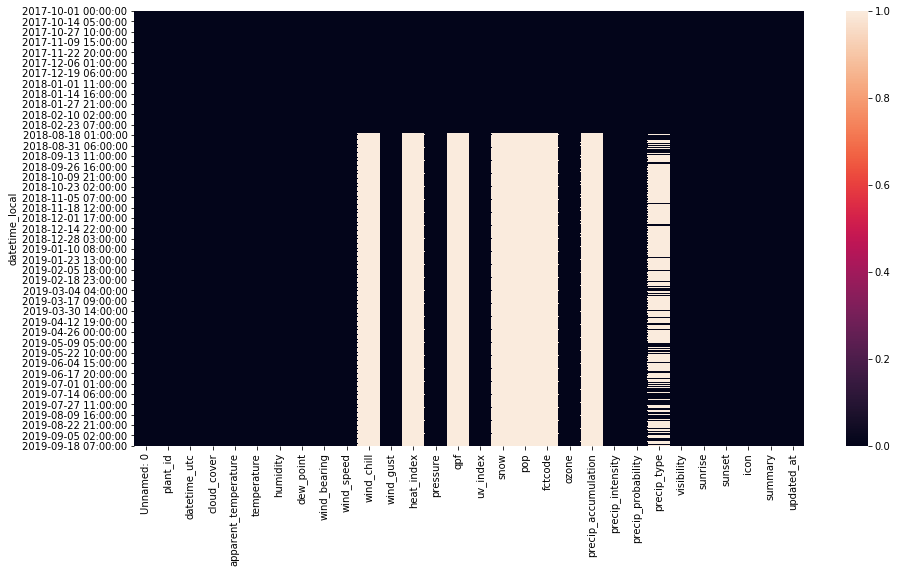

In [9]:
# Visualize the Missing Values
plt.figure(figsize=[15,8])
sns.heatmap(weather.isnull())

#### Energy Data

In [10]:
#checking the top 5 details of Datasets
print("\n\nTop 5 rows of the datasets :-")
energy.head()



Top 5 rows of the datasets :-


,Unnamed: 0,ghi,gti,power
datetime,,,,
2017-10-01 00:00:00,0,0.0,0.0,0.0
2017-10-01 00:15:00,1,0.0,0.0,0.0
2017-10-01 00:30:00,2,0.0,0.0,0.0
2017-10-01 00:45:00,3,0.0,0.0,0.0
2017-10-01 01:00:00,4,0.0,0.0,0.0


In [11]:
#checking the bottom 5 details of Datasets
print("\n\nBottom 5 details of the datasets :-")
energy.tail()



Bottom 5 details of the datasets :-


,Unnamed: 0,ghi,gti,power
datetime,,,,
2019-09-30 22:45:00,70075,0.0,0.0,0.0
2019-09-30 23:00:00,70076,0.0,0.0,0.0
2019-09-30 23:15:00,70077,0.0,0.0,0.0
2019-09-30 23:30:00,70078,0.0,0.0,0.0
2019-09-30 23:45:00,70079,0.0,0.0,0.0


In [12]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :-")
print("\nData Set : \n",'\n',energy.dtypes)



Datatypes of features in the datasets :-

Data Set : 
 
 Unnamed: 0     object
ghi           float64
gti           float64
power         float64
dtype: object


In [13]:
#hecking the number of rows
print("\n\nNumber of observations in the datasets :-")
print("\nData Set : \n",len(energy))

#checking the number of columns
print("\n\nNumber of features in the dataset :-")
print("\nData Set : ", len(energy.columns))


#checking the shape of dataset
print("\n\nShape of the dataset :-")
print("\nData Set : \n",energy.shape)



Number of observations in the datasets :-

Data Set : 
 70080


Number of features in the dataset :-

Data Set :  4


Shape of the dataset :-

Data Set : 
 (70080, 4)


In [14]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans value in the datasets :-")
print("\nData Set :- \n",'\n',energy.isnull().sum())



Number of empty cells or Nans value in the datasets :-

Data Set :- 
 
 Unnamed: 0        0
ghi           35040
gti           35040
power             0
dtype: int64


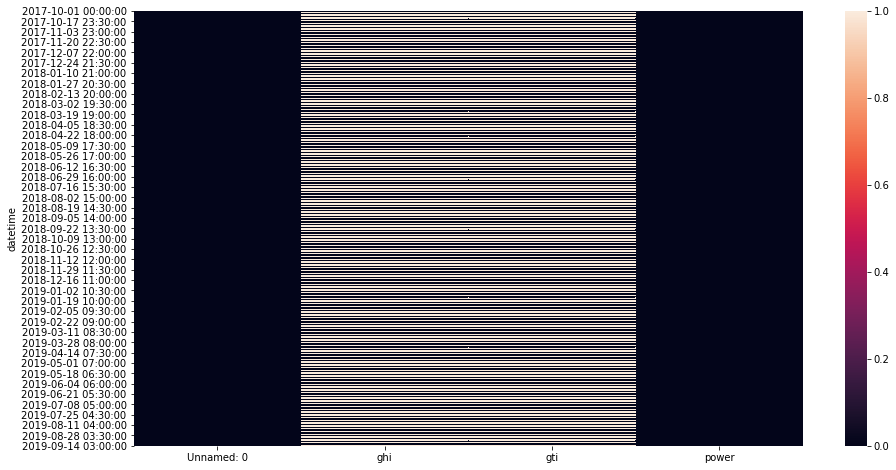

In [15]:
# Visualize the Missing Values
plt.figure(figsize=[15,8])
sns.heatmap(energy.isnull())

### Data Cleaning Process

*Creating two feature columns of numeric type and catagerical type to calculate missing value & Unique values*

#### Train Data Missing Value

In [16]:
#Creating numeric feature type column

numeric_features = weather.select_dtypes(include=[np.number])

numeric_features.columns

Index(['plant_id', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill',
       'wind_gust', 'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop',
       'fctcode', 'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'visibility'],
      dtype='object')

In [17]:
#Calculating total missing values percentage

total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = ((numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
heat_index,9875,72.508995
precip_accumulation,9875,72.508995
fctcode,9875,72.508995
pop,9875,72.508995
snow,9875,72.508995
qpf,9875,72.508995
wind_chill,9875,72.508995
wind_speed,0,0.000000
cloud_cover,0,0.000000


C:\Users\Vedika\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if sys.path[0] == '':


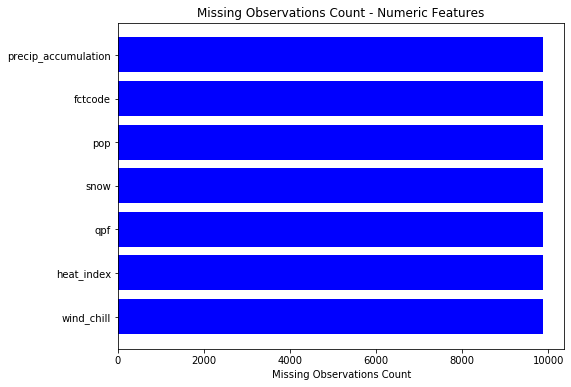

In [18]:
#ploting graph of missing value 


missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.009
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_values.missing_count.values, color='B')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [19]:
#Creating categorical feature type column

categorical_features = weather.select_dtypes(include=[np.object])

categorical_features.columns


Index(['Unnamed: 0', 'datetime_utc', 'precip_type', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [20]:
#Calculating total missing values percentage

total = categorical_features.isnull().sum().sort_values(ascending=False)
percent = ((categorical_features.isnull().sum()/categorical_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
precip_type,7129,52.345987
updated_at,0,0.000000
summary,0,0.000000
icon,0,0.000000
sunset,0,0.000000
sunrise,0,0.000000
datetime_utc,0,0.000000
Unnamed: 0,0,0.000000


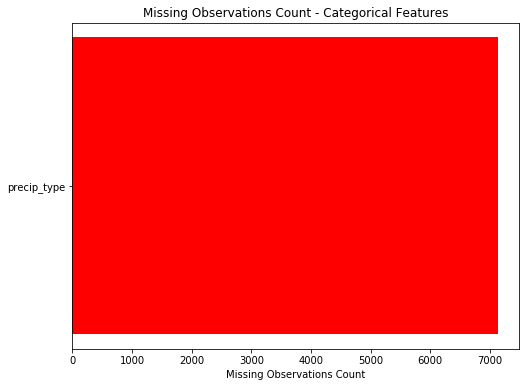

In [21]:
#ploting graph of missing value 


missing_values = categorical_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.001
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_values.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Categorical Features")
plt.show()

#### Test Data Missing Values

In [22]:
#Creating numeric feature type column

numeric_features = energy.select_dtypes(include=[np.number])

numeric_features.columns

Index(['ghi', 'gti', 'power'], dtype='object')

In [23]:
#Calculating total missing values percentage

total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = ((numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
gti,35040,50.0
ghi,35040,50.0
power,0,0.0


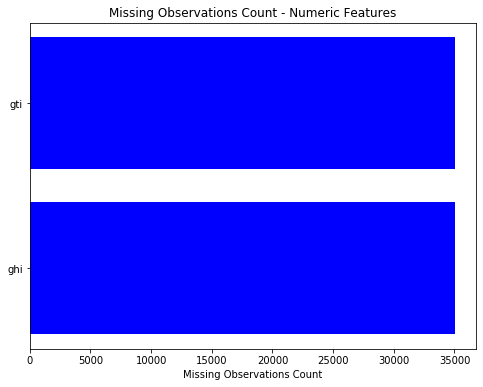

In [24]:
#ploting graph of missing value 


missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.001
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_values.missing_count.values, color='B')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

### Data cleaning of weather data

Replacing null value of weather data 

In [25]:
#Replacing null value of columns

weather=weather.replace('null',np.nan)

In [26]:
#Filing null value with mean

weather=weather.fillna(weather.mean())

In [27]:
weather['precip_type'] = weather['precip_type'].fillna(weather['precip_type'].mode()[0])

In [28]:
#checking the information of data features
print("\n\nInformation of data features in the datasets :- \n")
print(weather.info())



Information of data features in the datasets :- 

<class 'pandas.core.frame.DataFrame'>
Index: 13619 entries, 2017-10-01 00:00:00 to 2019-09-30 23:00:00
Data columns (total 30 columns):
Unnamed: 0              13619 non-null object
plant_id                13619 non-null int64
datetime_utc            13619 non-null object
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_chill              13619 non-null float64
wind_gust               13619 non-null float64
heat_index              13619 non-null float64
pressure                13619 non-null float64
qpf                     13619 non-null float64
uv_index                13619 non-null int64
snow                    13619 non-null float64
pop                     1

In [29]:
#checking for null values
print("\n\nNumber of Null value in the datasets :-")

print("\nData Set :- \n",'\n', weather.isnull().sum())



Number of Null value in the datasets :-

Data Set :- 
 
 Unnamed: 0              0
plant_id                0
datetime_utc            0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_chill              0
wind_gust               0
heat_index              0
pressure                0
qpf                     0
uv_index                0
snow                    0
pop                     0
fctcode                 0
ozone                   0
precip_accumulation     0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64


### Data cleaning of energy data

In [30]:
energy.ghi.value_counts()

0.0    35040
Name: ghi, dtype: int64

In [31]:
energy.ghi.describe()

count    35040.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: ghi, dtype: float64

In [32]:
energy.gti.unique()

array([ 0., nan])

In [33]:
energy.gti.describe()

count    35040.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: gti, dtype: float64

## Feature Engineering & Data Processing

Creating feature by separating the sunrise columns date & time to get separate value of boths columns

In [34]:
weather['sunrise'] = pd.to_datetime(weather['sunrise'])


In [35]:
weather['sunrisedate'] = weather['sunrise'].dt.date

In [36]:
weather['sunrise'] = weather['sunrise'].dt.time

In [37]:
weather['sunrisedate'] = pd.to_datetime(weather['sunrisedate'])

Extracting month from the sunrise data columns to get the month data

In [38]:
weather['month'] = weather['sunrisedate'].dt.month

In [39]:
weather['sunset'] = pd.to_datetime(weather['sunset'])


In [40]:
weather['sunsetdate'] = weather['sunset'].dt.date

In [41]:
weather['sunset'] = weather['sunset'].dt.time

***Creating new feature Season on the base of month data, This feature helps to specify weather season, as it not mention location we consider our location as india. so we impliment indian season methods***

In [42]:
def get_Season(month):

    
    if (month in (3,4)):
        return 'Spring'
    elif (month in (5,6)):
        return 'Summer'
    elif ( month in (7,8)):
        return 'Monsoon'
    elif ( month in (9,10)):
        return 'Autumn'
    elif ( month in (11,12)):
        return 'Pre-Winter'
    elif ( month in (1,2)):
        return 'Winter'
    
        
weather['Season'] = weather['month'].apply(get_Season) 


weather.drop(labels = ['month'], axis = 1, inplace = True)

***Creating feature the differance of sunset time and sunrise time, we get the duration of sunligt in minutes***

In [43]:
 weather['sunrise'] = pd.to_datetime(weather['sunrise'],format='%H:%M:%S')
weather['sunset'] = pd.to_datetime(weather['sunset'],format='%H:%M:%S')
weather['sunlight'] = (weather['sunset'] - weather['sunrise'])

In [44]:
def get_minutes(sunlight):
    return (sunlight.seconds//60)


weather['duration'] = weather['sunlight'].apply(get_minutes) 

### Data processing 

**Weather Data**

we drop following columns - 

Unnamed - as its not specify any data

plant_id - its indicates plant number & its same to all data

datetime_utc - its indicates Coordinated Universal Time, we can use it for extracting data but as of now we decide to drop this 

updated_at - its indicates data updated time in the system

sunrise, sunset  - we already extract the information from this columns so now we decide to drop this columns 

In [45]:
weather.drop(labels = ['Unnamed: 0','plant_id','datetime_utc','updated_at','sunrisedate','sunsetdate','sunlight','sunrise','sunset'], axis = 1, inplace = True)

In [46]:
weather

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,...,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,icon,summary,Season,duration
datetime_local,,,,,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,0.83,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,clear-night,Clear,Autumn,713
2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713
2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713
2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,0.45,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,clear-night,Clear,Autumn,713
2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,2.72,-9999.0,4.59,-9999.0,...,269.6,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715
2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,3.24,-9999.0,5.45,-9999.0,...,268.7,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715
2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,3.34,-9999.0,5.83,-9999.0,...,268.4,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715


**Energy data** 

we drop follwing columns

Unnamed - Its indicate unknow series data

ghi- Its indicate Global Horizontal Irradiance but if we look data 50% value is null & remaining value is zero its affect the power generation data on train method. 

gti - Global Tilted Irradiation/Irradiance same for the gti data as it mean & value is zero which affect the power generation data.

In [47]:
energy.drop(labels = ['Unnamed: 0', 'ghi', 'gti'], axis = 1, inplace = True)

In [48]:
energy

,power
datetime,
2017-10-01 00:00:00,0.0
2017-10-01 00:15:00,0.0
2017-10-01 00:30:00,0.0
2017-10-01 00:45:00,0.0
2017-10-01 01:00:00,0.0
...,...
2019-09-30 22:45:00,0.0
2019-09-30 23:00:00,0.0
2019-09-30 23:15:00,0.0


### Merge Data

Merge the weather & energy data on the time index to combine the two DataFrames

In [49]:
cc = pd.merge(weather, energy, how='inner', left_index=True, right_index=True)


In [50]:
cc

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,icon,summary,Season,duration,power
2017-10-01 00:00:00,0.00,26.52,26,1,19.46,308,0.83,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.57,clear-night,Clear,Autumn,713,0.0
2017-10-01 01:00:00,0.00,28.78,27,1,20.06,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713,0.0
2017-10-01 02:00:00,0.00,26.58,26,1,19.97,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713,0.0
2017-10-01 03:00:00,0.00,23.84,23,1,18.66,270,0.45,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.56,clear-night,Clear,Autumn,713,0.0
2017-10-01 04:00:00,0.00,24.13,24,1,17.84,-9999,-9999.00,-9999.0,-9999.00,-9999.0,...,-9999.0,-9999.0,-9999.0,rain,3.06,fog,Foggy,Autumn,713,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 19:00:00,0.16,31.66,29,1,21.19,40,2.72,-9999.0,4.59,-9999.0,...,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715,0.0
2019-09-30 20:00:00,0.16,30.42,28,1,21.35,59,3.24,-9999.0,5.45,-9999.0,...,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715,0.0
2019-09-30 21:00:00,0.18,29.56,27,1,21.61,76,3.34,-9999.0,5.83,-9999.0,...,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715,0.0
2019-09-30 22:00:00,0.30,28.97,27,1,21.99,88,3.22,-9999.0,5.73,-9999.0,...,-9999.0,0.0,0.0,rain,16.09,partly-cloudy-night,Partly Cloudy,Autumn,715,0.0


In [51]:
cc.isnull().sum()

cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_chill              0
wind_gust               0
heat_index              0
pressure                0
qpf                     0
uv_index                0
snow                    0
pop                     0
fctcode                 0
ozone                   0
precip_accumulation     0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
icon                    0
summary                 0
Season                  0
duration                0
power                   0
dtype: int64

In [52]:
#checking the information of data features
print("\n\nInformation of data features in the datasets :- \n")
print(cc.info())



Information of data features in the datasets :- 

<class 'pandas.core.frame.DataFrame'>
Index: 13619 entries, 2017-10-01 00:00:00 to 2019-09-30 23:00:00
Data columns (total 27 columns):
cloud_cover             13619 non-null float64
apparent_temperature    13619 non-null float64
temperature             13619 non-null int64
humidity                13619 non-null int64
dew_point               13619 non-null float64
wind_bearing            13619 non-null int64
wind_speed              13619 non-null float64
wind_chill              13619 non-null float64
wind_gust               13619 non-null float64
heat_index              13619 non-null float64
pressure                13619 non-null float64
qpf                     13619 non-null float64
uv_index                13619 non-null int64
snow                    13619 non-null float64
pop                     13619 non-null float64
fctcode                 13619 non-null float64
ozone                   13619 non-null float64
precip_accumulation  

In [53]:
#checking for null values
print("\n\nNumber of Null value in the datasets :-")

print("\nData Set :- \n",'\n', cc.isnull().sum())



Number of Null value in the datasets :-

Data Set :- 
 
 cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_chill              0
wind_gust               0
heat_index              0
pressure                0
qpf                     0
uv_index                0
snow                    0
pop                     0
fctcode                 0
ozone                   0
precip_accumulation     0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
icon                    0
summary                 0
Season                  0
duration                0
power                   0
dtype: int64


In [54]:
#Cheking Unique values in features
for i in cc.columns:
    print("Unique values in", i, cc[i].nunique())

Unique values in cloud_cover 102
Unique values in apparent_temperature 3808
Unique values in temperature 43
Unique values in humidity 2
Unique values in dew_point 3432
Unique values in wind_bearing 361
Unique values in wind_speed 699
Unique values in wind_chill 1
Unique values in wind_gust 1067
Unique values in heat_index 1
Unique values in pressure 2919
Unique values in qpf 1
Unique values in uv_index 14
Unique values in snow 1
Unique values in pop 1
Unique values in fctcode 1
Unique values in ozone 1262
Unique values in precip_accumulation 1
Unique values in precip_intensity 180
Unique values in precip_probability 66
Unique values in precip_type 2
Unique values in visibility 446
Unique values in icon 8
Unique values in summary 19
Unique values in Season 6
Unique values in duration 213
Unique values in power 1631


In [55]:
cc.corr()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,...,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,visibility,duration,power
cloud_cover,1.000000,0.166379,0.164960,-0.071690,0.062932,0.070571,0.075671,NaN,0.320889,NaN,...,NaN,NaN,NaN,0.320888,NaN,0.320889,0.320889,-0.018911,0.183109,0.010538
apparent_temperature,0.166379,1.000000,0.969744,-0.181759,0.567757,0.220673,0.187573,NaN,0.385751,NaN,...,NaN,NaN,NaN,0.386468,NaN,0.385658,0.385654,0.028750,0.807524,0.092502
temperature,0.164960,0.969744,1.000000,-0.324518,0.432929,0.223806,0.186522,NaN,0.368493,NaN,...,NaN,NaN,NaN,0.369282,NaN,0.368406,0.368404,0.014180,0.780303,0.057275
humidity,-0.071690,-0.181759,-0.324518,1.000000,0.497798,-0.219560,-0.191230,NaN,-0.185495,NaN,...,NaN,NaN,NaN,-0.185402,NaN,-0.185555,-0.185561,0.053018,-0.033948,0.037634
dew_point,0.062932,0.567757,0.432929,0.497798,1.000000,-0.005577,-0.005434,NaN,0.085277,NaN,...,NaN,NaN,NaN,0.085929,NaN,0.085163,0.085154,0.046960,0.538974,0.091669
wind_bearing,0.070571,0.220673,0.223806,-0.219560,-0.005577,1.000000,0.890365,NaN,0.471055,NaN,...,NaN,NaN,NaN,0.471057,NaN,0.471054,0.471054,-0.031508,0.212211,0.015508
wind_speed,0.075671,0.187573,0.186522,-0.191230,-0.005434,0.890365,1.000000,NaN,0.427106,NaN,...,NaN,NaN,NaN,0.427104,NaN,0.427106,0.427106,-0.025176,0.185304,0.014983
wind_chill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wind_gust,0.320889,0.385751,0.368493,-0.185495,0.085277,0.471055,0.427106,NaN,1.000000,NaN,...,NaN,NaN,NaN,0.999996,NaN,1.000000,1.000000,-0.059133,0.487164,0.032401
heat_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

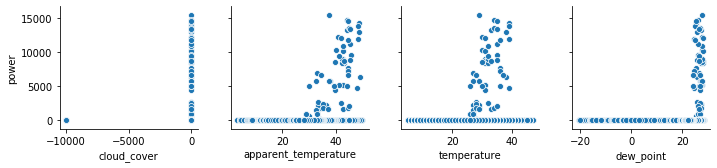

In [56]:
sns.pairplot(cc, x_vars=['cloud_cover', 'apparent_temperature', 'temperature', 'dew_point'], y_vars=['power'])

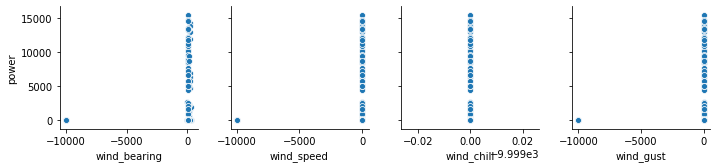

In [57]:
sns.pairplot(cc, x_vars=['wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust'], y_vars=['power'])

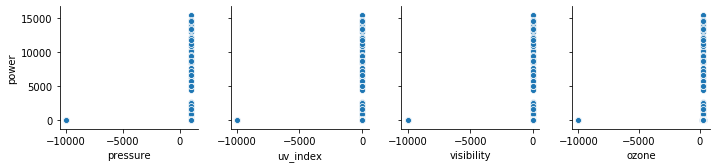

In [58]:
sns.pairplot(cc, x_vars=['pressure', 'uv_index', 'visibility', 'ozone'], y_vars=['power'])

### overview distribution of data points

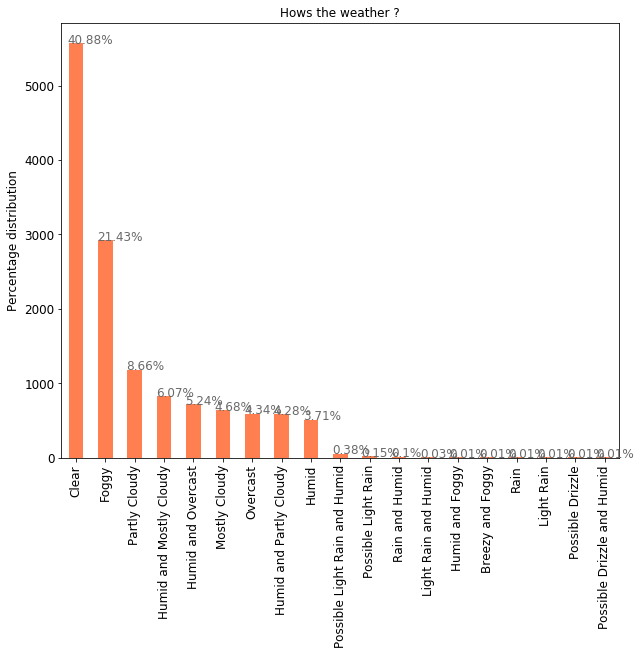

In [59]:
ax = cc['summary'].value_counts().plot(kind='bar', figsize=(10,8),
                                        color="coral", fontsize=12);
ax.set_alpha(0.8)
ax.set_title("Hows the weather ?", fontsize=12)
ax.set_ylabel("Percentage distribution", fontsize=12);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dimgrey')

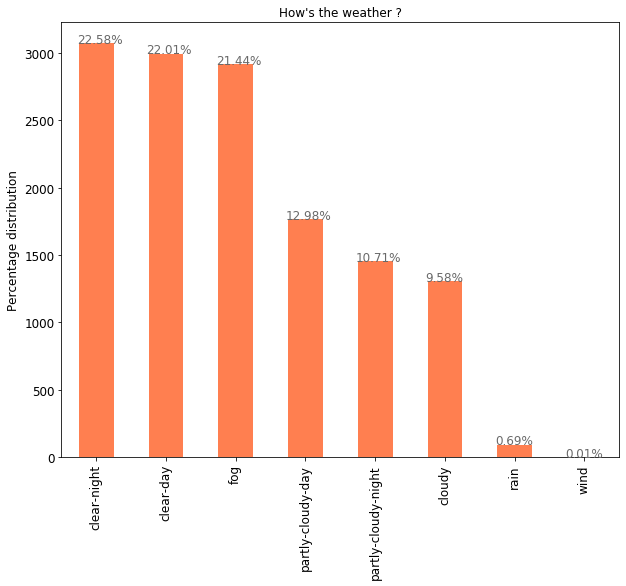

In [60]:
ax = cc['icon'].value_counts().plot(kind='bar', figsize=(10,8),
                                        color="coral", fontsize=12);
ax.set_alpha(0.8)
ax.set_title("How's the weather ?", fontsize=12)
ax.set_ylabel("Percentage distribution", fontsize=12);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.8, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dimgrey')

**Distribution of season** 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B094C46F60>],
      dtype=object)

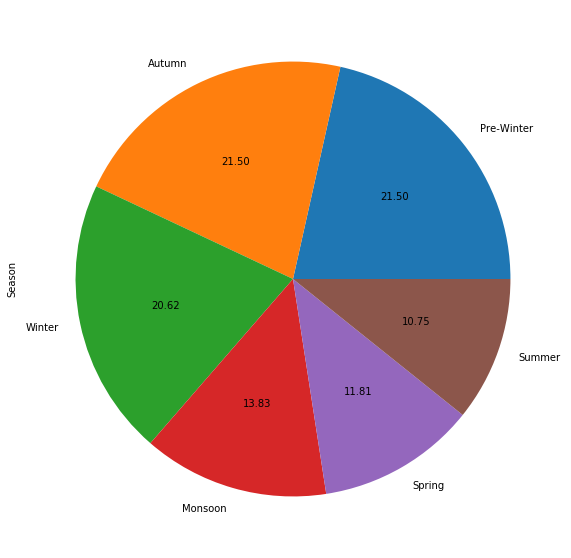

In [61]:
cc['Season'].value_counts().plot.pie(subplots=True, figsize=(12,10), autopct='%.2f')

### Machine Learning Modelling

In the model making we use two approch first is base model, which use on the weather forecast data to predict power generation.  Frst built a base model that uses weather forecasts to predict solar power generation.  

The focus was then moved to the existence of a set of the variables, which we call auxiliary variables,an auxiliary model identiﬁes the relationship between weather forecast variables and the auxiliary variables,then the main model for solar power uses both weather forecast variables and the auxiliary variables generated by the auxiliary model. 

We work on auxiliary model by combining weather forecast variables and weather observation variables

### Base Model

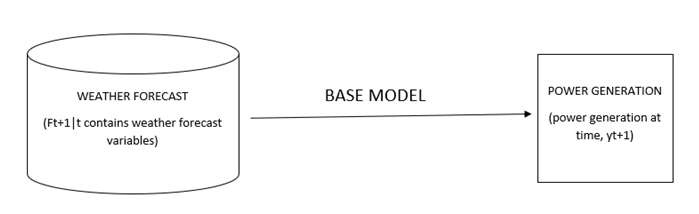

### Auxiliary Model

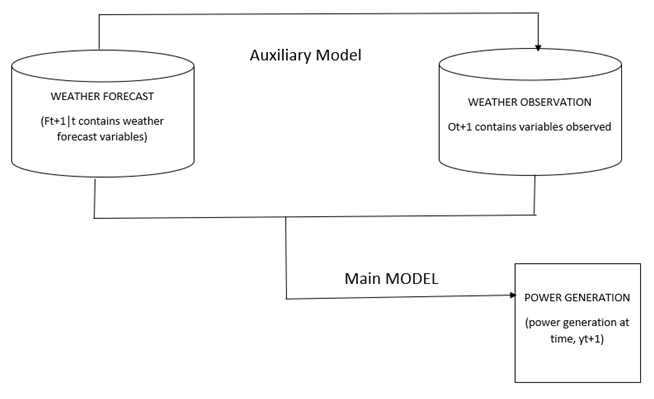

### Random Forest Algorithm

In [62]:
#Importing sklearn package's splitting data for train and test data
from sklearn.model_selection import train_test_split

In [63]:
#Get dummies
cc = pd.get_dummies(cc, columns=['precip_type', 'icon', 'summary', 'Season'],drop_first=True)

In [64]:
#defining feature
x = cc[['cloud_cover', 'apparent_temperature', 'temperature', 'humidity', 'dew_point', 'wind_bearing','wind_speed','wind_gust','ozone','precip_intensity','precip_probability','pressure','uv_index','visibility','duration']]
y = cc['power'] 

In [65]:
#splitting data into train & test
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3, random_state = 42,shuffle=True)


In [66]:
#RF Algorithm

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           random_state = 42)
rf = rf.fit(X_train, y_train)

print('\n\n R^2 Training Score:',(rf.score(X_train, y_train)))


print('\n\n R^2 Validation Score:',(rf.score(X_valid, y_valid)))



 R^2 Training Score: 0.9144819248009768


 R^2 Validation Score: 0.48247716922550854


**Feature Importance Sklearn**

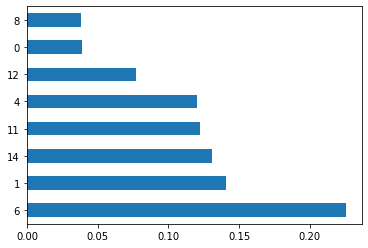

In [67]:
feat_importances = pd.Series(rf.feature_importances_)
feat_importances.nlargest(8).plot(kind='barh')

### Forecasting Solar Power Generation

**Preparing weather_ forecasting data as same as train data model**

In [68]:
forecast = pd.read_csv("weather_forecast.csv",parse_dates=[0], index_col=3)

In [69]:
#checking the top 5 details of Datasets
print("\n\nTop 5 rows of the datasets :-")
forecast.head()



Top 5 rows of the datasets :-


,Unnamed: 0,plant_id,datetime_utc,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,...,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
datetime_local,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,0,1,2019-09-30 18:30:00,0.35,26.41,26,1,22.01,101,3.08,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2019-10-01 01:00:00,1,1,2019-09-30 19:30:00,0.43,25.95,25,1,22.06,105,2.94,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2019-10-01 02:00:00,2,1,2019-09-30 20:30:00,0.48,25.46,25,1,22.06,106,2.82,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2019-10-01 03:00:00,3,1,2019-09-30 21:30:00,0.49,24.80,24,1,21.87,106,2.63,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2019-10-01 04:00:00,4,1,2019-09-30 22:30:00,0.49,23.99,23,1,21.53,100,2.39,...,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [70]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :-")
print("\nData Set : \n",'\n',forecast.dtypes)



Datatypes of features in the datasets :-

Data Set : 
 
 Unnamed: 0               object
plant_id                  int64
datetime_utc             object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_chill              float64
wind_gust               float64
heat_index              float64
pressure                float64
qpf                     float64
uv_index                  int64
snow                    float64
pop                     float64
fctcode                 float64
ozone                   float64
precip_accumulation     float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at   

In [71]:
#checking for NaNs or empty cells by features
print("\n\nNumber of empty cells or Nans value in the datasets :-")
print("\nData Set :- \n",'\n',forecast.isnull().sum())



Number of empty cells or Nans value in the datasets :-

Data Set :- 
 
 Unnamed: 0                0
plant_id                  0
datetime_utc              0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64


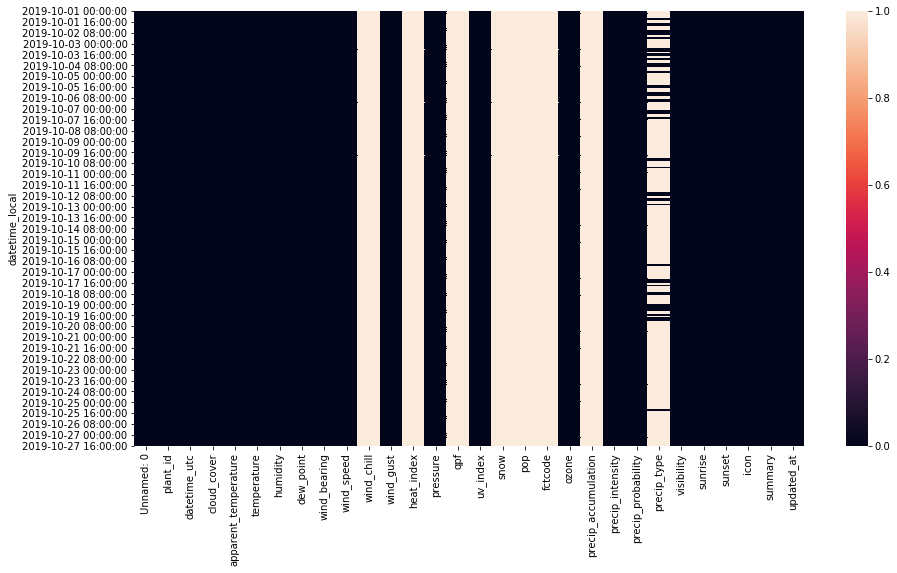

In [72]:
# Visualize the Missing Values
plt.figure(figsize=[15,8])
sns.heatmap(forecast.isnull())

In [73]:
#Creating numeric feature type column

numeric_features = forecast.select_dtypes(include=[np.number])

numeric_features.columns

Index(['plant_id', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill',
       'wind_gust', 'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop',
       'fctcode', 'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'visibility'],
      dtype='object')

In [74]:
#Calculating total missing values percentage

total = numeric_features.isnull().sum().sort_values(ascending=False)
percent = ((numeric_features.isnull().sum()/numeric_features.isnull().count()).sort_values(ascending=False)*100)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
heat_index,648,100.0
precip_accumulation,648,100.0
fctcode,648,100.0
pop,648,100.0
snow,648,100.0
qpf,648,100.0
wind_chill,648,100.0
wind_speed,0,0.0
cloud_cover,0,0.0


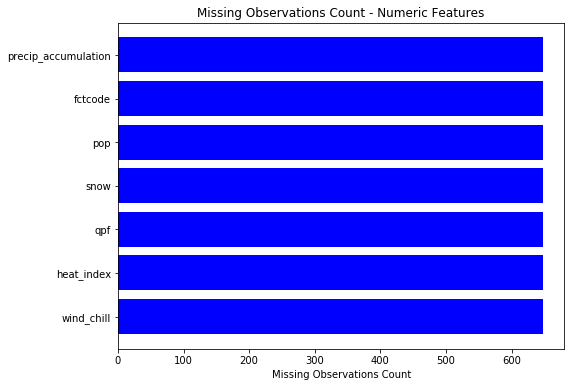

In [75]:
#ploting graph of missing value 


missing_values = numeric_features.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.009
fig, ax = plt.subplots(figsize=(8,6))
rects = ax.barh(ind, missing_values.missing_count.values, color='B')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

**Data Processing Forecasting Data**

In [76]:
forecast['sunrise'] = pd.to_datetime(forecast['sunrise'])


In [77]:
forecast['sunrisedate'] = forecast['sunrise'].dt.date

In [78]:
forecast['sunrise'] = forecast['sunrise'].dt.time

In [79]:
forecast['sunrisedate'] = pd.to_datetime(forecast['sunrisedate'])

creating feature engineering as same as train weather data

In [80]:
forecast['month'] = forecast['sunrisedate'].dt.month

In [81]:
forecast['sunset'] = pd.to_datetime(forecast['sunset'])


In [82]:
forecast['sunsetdate'] = forecast['sunset'].dt.date

In [83]:
forecast['sunset'] = forecast['sunset'].dt.time

Creating feature of season

In [84]:
def get_Season(month):

    
    if (month in (3,4)):
        return 'Spring'
    elif (month in (5,6)):
        return 'Summer'
    elif ( month in (7,8)):
        return 'Monsoon'
    elif ( month in (9,10)):
        return 'Autumn'
    elif ( month in (11,12)):
        return 'Pre-Winter'
    elif ( month in (1,2)):
        return 'Winter'
    
        
forecast['Season'] = forecast['month'].apply(get_Season) 


forecast.drop(labels = ['month'], axis = 1, inplace = True)

In [85]:
 forecast['sunrise'] = pd.to_datetime(forecast['sunrise'],format='%H:%M:%S')
forecast['sunset'] = pd.to_datetime(forecast['sunset'],format='%H:%M:%S')
forecast['sunlight'] = (forecast['sunset'] - forecast['sunrise'])

In [86]:
def get_minutes(sunlight):
    return (sunlight.seconds//60)


forecast['duration'] = forecast['sunlight'].apply(get_minutes) 

**Define Data For Prediction** 

In [87]:
forecast.drop(labels = ['Unnamed: 0','plant_id','heat_index','fctcode','precip_type','qpf','pop','snow','wind_chill','precip_accumulation','datetime_utc','updated_at','sunrisedate','sunsetdate','sunlight','sunrise','sunset'], axis = 1, inplace = True)

In [88]:
#checking for null values
print("\n\nNumber of Null value in the datasets :-")

print("\nData Set :- \n",'\n', forecast.isnull().sum())



Number of Null value in the datasets :-

Data Set :- 
 
 cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
icon                    0
summary                 0
Season                  0
duration                0
dtype: int64


In [89]:
#checking the information of data features
print("\n\nInformation of data features in the datasets :- \n")
print(forecast.info())



Information of data features in the datasets :- 

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 2019-10-01 00:00:00 to 2019-10-27 23:00:00
Data columns (total 18 columns):
cloud_cover             648 non-null float64
apparent_temperature    648 non-null float64
temperature             648 non-null int64
humidity                648 non-null int64
dew_point               648 non-null float64
wind_bearing            648 non-null int64
wind_speed              648 non-null float64
wind_gust               648 non-null float64
pressure                648 non-null float64
uv_index                648 non-null int64
ozone                   648 non-null float64
precip_intensity        648 non-null float64
precip_probability      648 non-null float64
visibility              648 non-null float64
icon                    648 non-null object
summary                 648 non-null object
Season                  648 non-null object
duration                648 non-null int64
dtypes: float64(1

**Managing data columns of x_train & x_test**

**Creating model to test prediction**

In [92]:
forecast = pd.get_dummies(forecast, columns=['icon', 'summary', 'Season'],drop_first=True)

In [93]:
X_train = cc[['cloud_cover', 'apparent_temperature', 'temperature', 'humidity', 'dew_point', 'wind_bearing','wind_speed','wind_gust','ozone','precip_intensity','precip_probability','pressure','uv_index','visibility','duration']]
y_train = cc['power']

X_valid = forecast

In [96]:
missing_cols_test = []
for col in X_valid.columns:
    if col not in X_train.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    X_train[i] = 0

C:\Users\Vedika\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [90]:
missing_cols_test = []
for col in X_train.columns:
    if col not in X_valid.columns:
        missing_cols_test.append(col)
        
for i in missing_cols_test:
    X_valid[i] = 0

In [97]:
X_train.shape, X_valid.shape

((13619, 23), (648, 23))

In [98]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           random_state = 42)
rf.fit(X_train, y_train)

Y_predict = rf.predict(X_valid)

In [99]:
Y_predict

array([356.1922, 356.1652, 356.1652, 356.1652, 285.3443, 267.8411,
       267.8392, 341.9166, 352.4387, 377.9562, 420.7401, 357.6335,
       357.5779, 357.6181, 357.5712, 431.6456, 431.6598, 424.1367,
       420.1058, 409.2301, 342.689 , 429.8304, 374.1049, 340.0107,
       356.1427, 356.181 , 285.3281, 276.2083, 267.8503, 267.8754,
       267.8354, 267.8493, 271.8889, 297.3093, 343.9351, 345.939 ,
       345.9623, 357.7513, 357.7043, 357.6838, 356.9313, 349.4033,
       346.1454, 335.148 , 358.2582, 352.3926, 289.0772, 283.9514,
       282.0987, 282.0987, 285.3291, 285.2988, 267.8315, 267.8296,
       267.8672, 267.871 , 271.8782, 344.0291, 346.6328, 346.6361,
       357.6141, 357.578 , 351.7932, 351.7632, 351.7962, 340.2263,
       409.2264, 432.3406, 410.4071, 410.4125, 361.2646, 358.0354,
       356.192 , 356.1785, 265.9811, 265.9811, 282.1094, 359.3982,
       273.0046, 267.8503, 271.8618, 387.2715, 374.7226, 510.5635,
       418.8641, 429.8824, 429.1294, 429.1243, 431.0404, 408.4

In [100]:
#Saving the predictions to an excel sheet
pd.DataFrame(Y_predict, columns = ['power']).to_excel("Energy_forecast.xlsx")